<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/exporta%C3%A7%C3%B5es_mercosul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

country     ARG       BOL  BRA       CHL  PER  PRY       URY
date                                                        
1960-01-01  NaN  1.000000  NaN  1.000000  NaN  NaN  1.000000
1961-01-01  NaN  1.100551  NaN  1.026355  NaN  NaN  1.363636
1962-01-01  NaN  1.111570  NaN  1.191219  NaN  NaN  1.200000
1963-01-01  NaN  1.341598  NaN  1.281401  NaN  NaN  1.120000
1964-01-01  NaN  1.807163  NaN  1.361444  NaN  NaN  1.411765


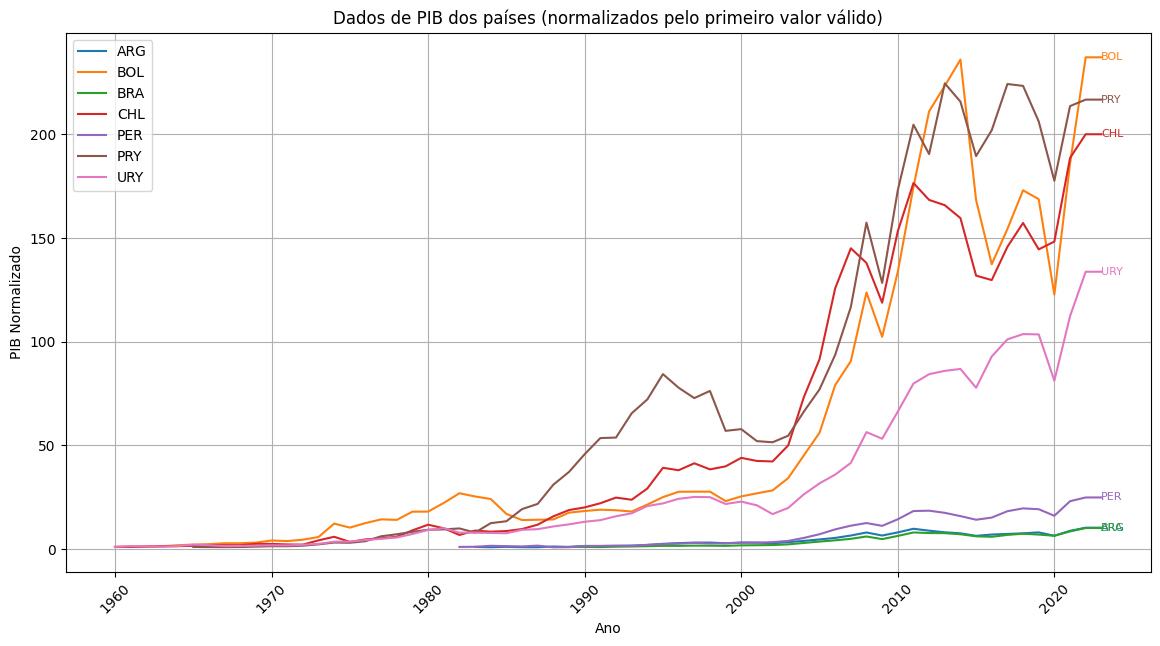

In [7]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Países de interesse
paises = ["BRA", "ARG", "PRY", "URY", "PER", "BOL", "CHL"]

# Indicador das exportações em dólares (NY.GDP.MKTP.CD)
indicador_exp ="NE.EXP.GNFS.CD"

def consultar_dados_pais(codigo_pais, indicador):
    """
    Consulta dados de um indicador específico para um país na API do Banco Mundial.

    Args:
        codigo_pais: Código do país (por exemplo, "BRA").
        indicador: Código do indicador (por exemplo, "NY.GDP.MKTP.CD").

    Returns:
        DataFrame com os dados consultados ou mensagem de erro.
    """
    url = f"http://api.worldbank.org/v2/country/{codigo_pais}/indicator/{indicador}?format=json&per_page=1000"
    resposta = requests.get(url)

    if resposta.status_code == 200:
        dados = json.loads(resposta.text)
        if len(dados) > 1 and isinstance(dados[1], list):
            valores = dados[1]
            df = pd.DataFrame(valores)
            df['country'] = codigo_pais
            return df[['date', 'value', 'country']]
        else:
            print(f"Estrutura da resposta inesperada para {codigo_pais}: {json.dumps(dados, indent=2)}")
            return pd.DataFrame()
    else:
        print(f"Erro ao consultar dados de {indicador} para {codigo_pais}: {resposta.status_code}")
        return pd.DataFrame()

# Coletando dados para todos os países
data_frames = []
for codigo_pais in paises:
    df_pais = consultar_dados_pais(codigo_pais, indicador_exp)
    if not df_pais.empty:
        data_frames.append(df_pais)

# Concatenando todos os dados em um único DataFrame
gdp_data = pd.concat(data_frames)

# Tratando os dados: convertendo a coluna 'date' para datetime e a coluna 'value' para float
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'], errors='coerce')

# Pivotando os dados para ter países como colunas e datas como índice
gdp_pivot = gdp_data.pivot(index='date', columns='country', values='value')

# Tratando dados faltantes: preenchendo com dados anteriores ou posteriores existentes
gdp_pivot = gdp_pivot.fillna(method='ffill')

# Normalizando os dados pelo primeiro valor válido de cada país na série de dados
gdp_normalized = gdp_pivot.div(gdp_pivot.bfill().iloc[0])

# Verificando o DataFrame normalizado
print(gdp_normalized.head())

# Plotando o gráfico temporal para cada país
plt.figure(figsize=(14, 7))
for country in gdp_normalized.columns:
    plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título
plt.title("Dados de Exportações dos países (normalizados pelo primeiro valor válido)")
plt.xlabel("Ano")
plt.ylabel("Exportações Normalizada")

# Adicionando a legenda manualmente no final de cada linha
for i, country in enumerate(gdp_normalized.columns):
    plt.text(gdp_normalized.index[-1], gdp_normalized.iloc[-1, i], country,
             ha='left', va='center', fontsize=8, color=plt.gca().lines[i].get_color())

# Mostrando a grade no gráfico
plt.grid(True)

# Removendo a legenda automática
plt.legend()

# Mostrando o gráfico
plt.show()



country     ARG           BOL  BRA           CHL  PER  PRY           URY
date                                                                    
1960-01-01  NaN  6.050000e+07  NaN  5.366089e+08  NaN  NaN  1.666667e+08
1961-01-01  NaN  6.658333e+07  NaN  5.507512e+08  NaN  NaN  2.272727e+08
1962-01-01  NaN  6.725000e+07  NaN  6.392190e+08  NaN  NaN  2.000000e+08
1963-01-01  NaN  8.116667e+07  NaN  6.876113e+08  NaN  NaN  1.866667e+08
1964-01-01  NaN  1.093333e+08  NaN  7.305629e+08  NaN  NaN  2.352941e+08


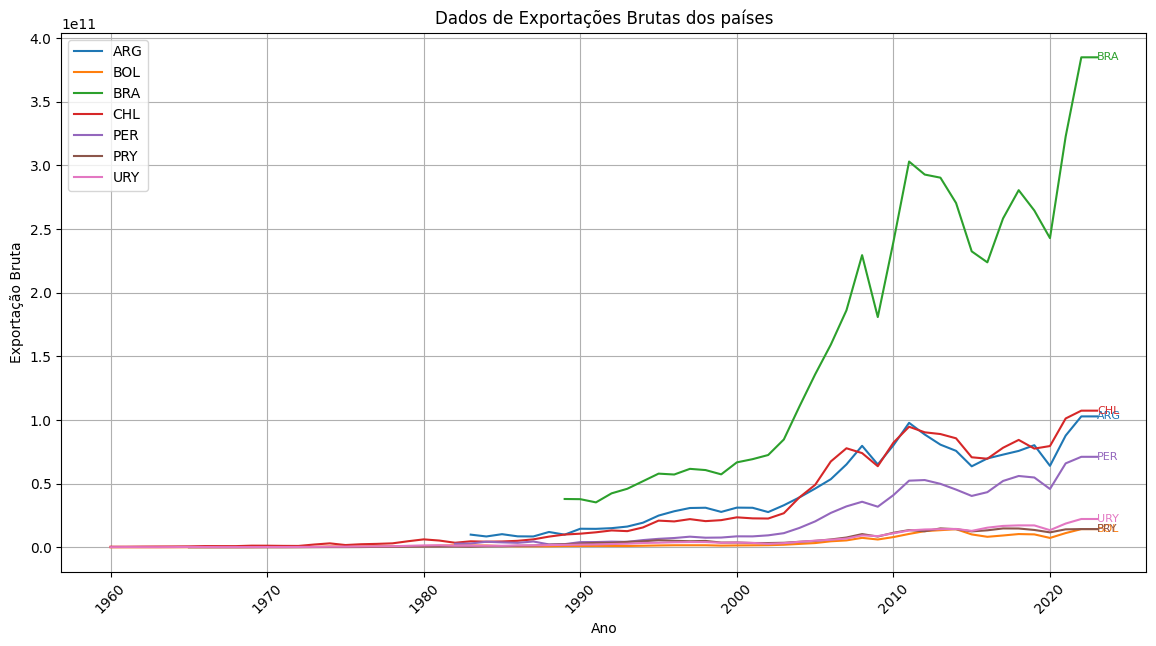

In [10]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Países de interesse
paises = ["BRA", "ARG", "PRY", "URY", "PER", "BOL", "CHL"]

# Indicador das exportações em dólares (NY.GDP.MKTP.CD)
indicador_exp ="NE.EXP.GNFS.CD"

def consultar_dados_pais(codigo_pais, indicador):
    """
    Consulta dados de um indicador específico para um país na API do Banco Mundial.

    Args:
        codigo_pais: Código do país (por exemplo, "BRA").
        indicador: Código do indicador (por exemplo, "NY.GDP.MKTP.CD").

    Returns:
        DataFrame com os dados consultados ou mensagem de erro.
    """
    url = f"http://api.worldbank.org/v2/country/{codigo_pais}/indicator/{indicador}?format=json&per_page=1000"
    resposta = requests.get(url)

    if resposta.status_code == 200:
        dados = json.loads(resposta.text)
        if len(dados) > 1 and isinstance(dados[1], list):
            valores = dados[1]
            df = pd.DataFrame(valores)
            df['country'] = codigo_pais
            return df[['date', 'value', 'country']]
        else:
            print(f"Estrutura da resposta inesperada para {codigo_pais}: {json.dumps(dados, indent=2)}")
            return pd.DataFrame()
    else:
        print(f"Erro ao consultar dados de {indicador} para {codigo_pais}: {resposta.status_code}")
        return pd.DataFrame()

# Coletando dados para todos os países
data_frames = []
for codigo_pais in paises:
    df_pais = consultar_dados_pais(codigo_pais, indicador_exp)
    if not df_pais.empty:
        data_frames.append(df_pais)

# Concatenando todos os dados em um único DataFrame
gdp_data = pd.concat(data_frames)

# Tratando os dados: convertendo a coluna 'date' para datetime e a coluna 'value' para float
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'], errors='coerce')

# Pivotando os dados para ter países como colunas e datas como índice
gdp_pivot = gdp_data.pivot(index='date', columns='country', values='value')

# Tratando dados faltantes: preenchendo com dados anteriores ou posteriores existentes
gdp_pivot = gdp_pivot.fillna(method='ffill')

# Normalizando os dados pelo primeiro valor válido de cada país na série de dados
gdp_normalized = gdp_pivot

# Verificando o DataFrame normalizado
print(gdp_normalized.head())

# Plotando o gráfico temporal para cada país
plt.figure(figsize=(14, 7))
for country in gdp_normalized.columns:
    plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título
plt.title("Dados de Exportações Brutas dos países")
plt.xlabel("Ano")
plt.ylabel("Exportação Bruta")

# Adicionando a legenda manualmente no final de cada linha
for i, country in enumerate(gdp_normalized.columns):
    plt.text(gdp_normalized.index[-1], gdp_normalized.iloc[-1, i], country,
             ha='left', va='center', fontsize=8, color=plt.gca().lines[i].get_color())

# Mostrando a grade no gráfico
plt.grid(True)

# Introduzindo a legenda
plt.legend()

# Mostrando o gráfico
plt.show()



In [9]:
gdp_normalized

country,ARG,BOL,BRA,CHL,PER,PRY,URY
date,,,,,,,
1960-01-01,NaN,6.050000e+07,NaN,5.366089e+08,NaN,NaN,1.666667e+08
1961-01-01,NaN,6.658333e+07,NaN,5.507512e+08,NaN,NaN,2.272727e+08
1962-01-01,NaN,6.725000e+07,NaN,6.392190e+08,NaN,NaN,2.000000e+08
1963-01-01,NaN,8.116667e+07,NaN,6.876113e+08,NaN,NaN,1.866667e+08
1964-01-01,NaN,1.093333e+08,NaN,7.305629e+08,NaN,NaN,2.352941e+08
...,...,...,...,...,...,...,...
2019-01-01,8.025948e+10,1.021044e+10,2.645630e+11,7.757104e+10,5.488744e+10,1.368623e+10,1.725596e+10
2020-01-01,6.405381e+10,7.425818e+09,2.428721e+11,7.959240e+10,4.586458e+10,1.178851e+10,1.352869e+10
2021-01-01,8.780582e+10,1.124314e+10,3.226939e+11,1.012416e+11,6.598156e+10,1.417741e+10,1.871973e+10


country          ARG       BOL       BRA       CHL       PER       PRY  \
date                                                                     
2000-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2001-01-01  0.996436  1.059523  1.037470  0.965920  0.995502  0.899839   
2002-01-01  0.888319  1.114435  1.086399  0.960437  1.090583  0.890331   
2003-01-01  1.059596  1.348258  1.269056  1.136454  1.287061  0.944963   
2004-01-01  1.257603  1.780110  1.658331  1.666141  1.763125  1.145922   

country          URY  
date                  
2000-01-01  1.000000  
2001-01-01  0.921521  
2002-01-01  0.736251  
2003-01-01  0.867060  
2004-01-01  1.153223  


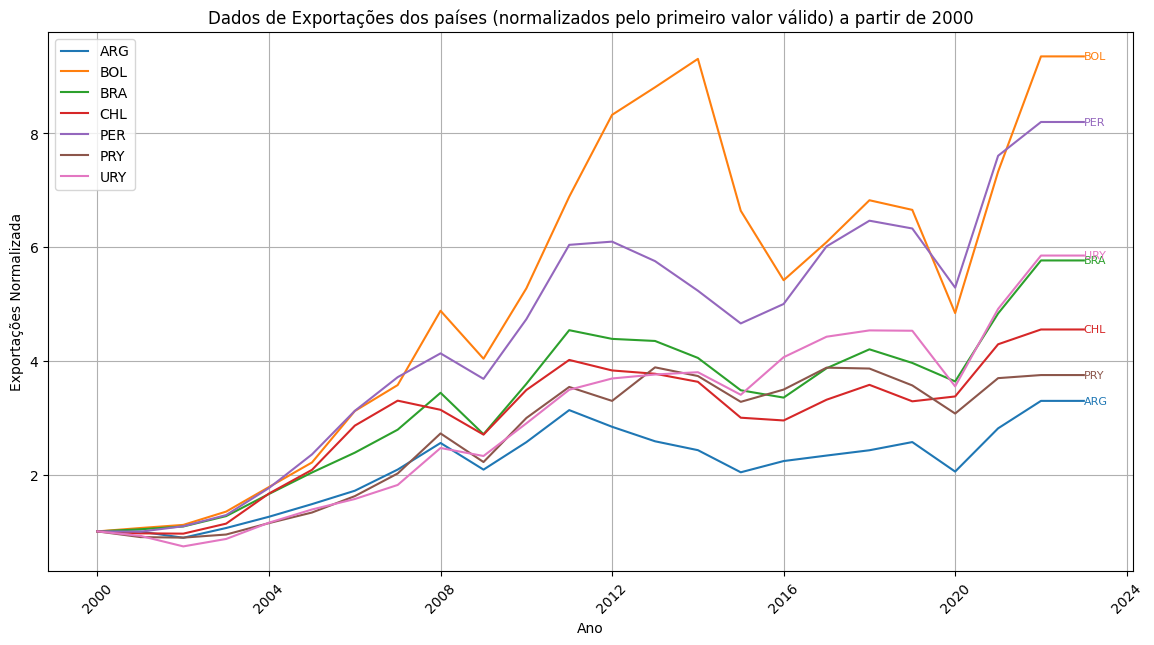

In [1]:
# Análise dos dados de exportação a partir do ano 2000
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Países de interesse
paises = ["BRA", "ARG", "PRY", "URY", "PER", "BOL", "CHL"]

# Indicador das exportações em dólares (NY.GDP.MKTP.CD)
indicador_exp ="NE.EXP.GNFS.CD"

def consultar_dados_pais(codigo_pais, indicador):
    """
    Consulta dados de um indicador específico para um país na API do Banco Mundial.

    Args:
        codigo_pais: Código do país (por exemplo, "BRA").
        indicador: Código do indicador (por exemplo, "NY.GDP.MKTP.CD").

    Returns:
        DataFrame com os dados consultados ou mensagem de erro.
    """
    url = f"http://api.worldbank.org/v2/country/{codigo_pais}/indicator/{indicador}?format=json&per_page=1000"
    resposta = requests.get(url)

    if resposta.status_code == 200:
        dados = json.loads(resposta.text)
        if len(dados) > 1 and isinstance(dados[1], list):
            valores = dados[1]
            df = pd.DataFrame(valores)
            df['country'] = codigo_pais
            return df[['date', 'value', 'country']]
        else:
            print(f"Estrutura da resposta inesperada para {codigo_pais}: {json.dumps(dados, indent=2)}")
            return pd.DataFrame()
    else:
        print(f"Erro ao consultar dados de {indicador} para {codigo_pais}: {resposta.status_code}")
        return pd.DataFrame()

# Coletando dados para todos os países
data_frames = []
for codigo_pais in paises:
    df_pais = consultar_dados_pais(codigo_pais, indicador_exp)
    if not df_pais.empty:
        data_frames.append(df_pais)

# Concatenando todos os dados em um único DataFrame
gdp_data = pd.concat(data_frames)

# Tratando os dados: convertendo a coluna 'date' para datetime e a coluna 'value' para float
gdp_data['date'] = pd.to_datetime(gdp_data['date'])
gdp_data['value'] = pd.to_numeric(gdp_data['value'], errors='coerce')

# Filtrando os dados a partir do ano 2000
gdp_data = gdp_data[gdp_data['date'].dt.year >= 2000]

# Pivotando os dados para ter países como colunas e datas como índice
gdp_pivot = gdp_data.pivot(index='date', columns='country', values='value')

# Tratando dados faltantes: preenchendo com dados anteriores ou posteriores existentes
gdp_pivot = gdp_pivot.fillna(method='ffill')

# Normalizando os dados pelo primeiro valor válido de cada país na série de dados
gdp_normalized = gdp_pivot.div(gdp_pivot.bfill().iloc[0])

# Verificando o DataFrame normalizado
print(gdp_normalized.head())

# Plotando o gráfico temporal para cada país
plt.figure(figsize=(14, 7))
for country in gdp_normalized.columns:
    plt.plot(gdp_normalized.index, gdp_normalized[country], label=country)

# Organizando as datas no eixo "x"
plt.xticks(rotation=45)

# Adicionando título
plt.title("Dados de Exportações dos países (normalizados pelo primeiro valor válido) a partir de 2000")
plt.xlabel("Ano")
plt.ylabel("Exportações Normalizada")

# Adicionando a legenda manualmente no final de cada linha
for i, country in enumerate(gdp_normalized.columns):
    plt.text(gdp_normalized.index[-1], gdp_normalized.iloc[-1, i], country,
             ha='left', va='center', fontsize=8, color=plt.gca().lines[i].get_color())

# Mostrando a grade no gráfico
plt.grid(True)

# Removendo a legenda automática
plt.legend()

# Mostrando o gráfico
plt.show()
